In [1]:
# 1. Import data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
print('Train Data\n')
print(df_train.head(2))
print('Test Data\n')
print(df_test.head(2))

Train Data

      UID  COUNTYID  STATEID     state state_ab        city     place  type  \
0  267822        53       36  New York       NY    Hamilton  Hamilton     1   
1  246444       141       18   Indiana       IN  South Bend  Roseland     1   

  primary  zip_code  ...  pct_own  married  married_snp  separated  divorced  \
0   tract     13346  ...  0.79046  0.57851      0.01882    0.01240    0.0877   
1   tract     46616  ...  0.52483  0.34886      0.01426    0.01426    0.0903   

   bad_debt  good_debt  pop_density  median_age   pop_bin  
0   0.09408    0.43555     0.000026   44.667430  very_low  
1   0.04274    0.56581     0.001687   34.722748  very_low  

[2 rows x 83 columns]
Test Data

      UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID     state state_ab     city  \
0  255504      NaN       140       163       26  Michigan       MI  Detroit   
1  252676      NaN       140         1       23     Maine       ME   Auburn   

                   place  type  ... female_age_mean  fema

In [5]:
df_train.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_

In [6]:
df_test.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [7]:
df_train.size

2242577

In [8]:
df_test.size

936720

In [9]:
df_train.describe()

,UID,COUNTYID,STATEID,type,zip_code,area_code,lat,lng,ALand,AWater,...,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,good_debt,pop_density,median_age
count,27019.000000,27019.000000,27019.000000,27019.000000,27019.000000,27019.000000,27019.000000,27019.000000,2.701900e+04,2.701900e+04,...,27019.000000,27019.000000,27019.000000,27019.000000,27019.000000,27019.000000,27019.000000,27019.000000,2.701900e+04,27019.000000
mean,257310.991673,85.592139,28.246567,2.379770,50132.614568,596.381509,37.530584,-91.306019,1.302186e+08,6.495841e+06,...,2211.116807,0.642387,0.509317,0.047341,0.019072,0.100384,0.105107,0.524665,2.054426e-03,39.251020
std,21340.758358,98.176550,16.371166,1.693632,29539.429679,232.438332,5.576366,16.329382,1.282239e+09,2.198107e+08,...,1083.058048,0.223927,0.135681,0.037151,0.020741,0.048800,0.070607,0.129965,4.518061e-03,7.580643
min,220342.000000,1.000000,1.000000,1.000000,602.000000,201.000000,17.929085,-165.453872,4.113400e+04,0.000000e+00,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.042638e-09,13.378362
25%,238819.500000,29.000000,13.000000,1.000000,27023.000000,405.000000,33.910638,-97.820012,1.806570e+06,0.000000e+00,...,1474.000000,0.505685,0.426585,0.020830,0.004560,0.066045,0.052565,0.448685,1.267407e-04,34.167624
50%,257187.000000,63.000000,28.000000,1.000000,47904.000000,614.000000,38.767808,-86.591218,4.879552e+06,2.767400e+04,...,2068.000000,0.691585,0.527230,0.038770,0.013460,0.095330,0.098530,0.528920,8.628578e-04,39.214730
75%,275779.000000,109.000000,42.000000,4.000000,77095.000000,801.000000,41.397687,-79.811109,3.376139e+07,5.239845e+05,...,2773.000000,0.817390,0.606035,0.064885,0.027450,0.129030,0.149040,0.604870,2.066173e-03,43.889041
max,294334.000000,840.000000,72.000000,6.000000,99925.000000,989.000000,67.074017,-65.379332,1.039510e+11,2.453228e+10,...,27250.000000,1.000000,1.000000,0.714290,0.714290,1.000000,1.000000,1.000000,7.653605e-02,80.166670


In [10]:
df_test.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,11709.000000,0.0,11709.0,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,1.170900e+04,...,11613.000000,11613.000000,11613.000000,11613.000000,11613.000000,11587.000000,11625.000000,11625.000000,11625.000000,11625.000000
mean,257525.004783,NaN,140.0,85.710650,28.489196,50123.418396,593.598514,37.405491,-91.340229,1.095500e+08,...,40.111999,40.131864,22.148145,550.411243,2233.003186,0.634194,0.505632,0.047960,0.019346,0.099191
std,21466.372658,NaN,0.0,99.304334,16.607262,29775.134038,232.074263,5.625904,16.407818,7.624940e+08,...,5.851192,7.972026,2.554907,280.992521,1072.017063,0.232232,0.139774,0.038693,0.021428,0.048525
min,220336.000000,NaN,140.0,1.000000,1.000000,601.000000,201.000000,17.965835,-166.770979,8.299000e+03,...,15.360240,12.833330,0.737110,0.251910,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238819.000000,NaN,140.0,29.000000,13.000000,25570.000000,404.000000,33.919813,-97.816561,1.718660e+06,...,36.729210,34.750000,21.270920,363.225840,1499.000000,0.492500,0.422020,0.020890,0.004500,0.064590
50%,257651.000000,NaN,140.0,61.000000,28.000000,47362.000000,612.000000,38.618093,-86.643344,4.835000e+06,...,40.196960,40.333330,22.472990,509.103610,2099.000000,0.687640,0.525270,0.038680,0.013870,0.094350
75%,276300.000000,NaN,140.0,109.000000,42.000000,77406.000000,787.000000,41.232973,-79.697311,3.204540e+07,...,43.496490,45.333330,23.549450,685.883910,2800.000000,0.815235,0.605660,0.065340,0.027910,0.128400
max,294333.000000,NaN,140.0,810.000000,72.000000,99929.000000,989.000000,64.804269,-65.695344,5.520166e+10,...,90.107940,90.166670,29.626680,4145.557870,15466.000000,1.000000,1.000000,0.714290,0.714290,0.362750


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27019 entries, 0 to 27018
Data columns (total 83 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27019 non-null  int64  
 1   COUNTYID                     27019 non-null  int64  
 2   STATEID                      27019 non-null  int64  
 3   state                        27019 non-null  object 
 4   state_ab                     27019 non-null  object 
 5   city                         27019 non-null  object 
 6   place                        27019 non-null  object 
 7   type                         27019 non-null  int64  
 8   primary                      27019 non-null  object 
 9   zip_code                     27019 non-null  int64  
 10  area_code                    27019 non-null  int64  
 11  lat                          27019 non-null  float64
 12  lng                          27019 non-null  float64
 13  ALand           

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

In [13]:
# 2. Figure out the primary key and look for the requirement of indexing

In [14]:
df_train.set_index('UID',inplace=True)
df_test.set_index('UID',inplace=True)

In [15]:
df_train.head(2)

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,pct_own,married,married_snp,separated,divorced,bad_debt,good_debt,pop_density,median_age,pop_bin
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,1,tract,13346,315,...,0.79046,0.57851,0.01882,0.01240,0.0877,0.09408,0.43555,0.000026,44.667430,very_low
246444,141,18,Indiana,IN,South Bend,Roseland,1,tract,46616,574,...,0.52483,0.34886,0.01426,0.01426,0.0903,0.04274,0.56581,0.001687,34.722748,very_low


In [16]:
df_test.head(2)

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377


### UID is the primary key as its is an unique User ID and can be used for indexing.

In [17]:
# 3. Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable

In [14]:
df_train.isnull().sum()

UID            0
COUNTYID       0
STATEID        0
state          0
state_ab       0
              ..
bad_debt       0
good_debt      0
pop_density    0
median_age     0
pop_bin        0
Length: 83, dtype: int64

In [13]:
# Since BlOCKID is completly missing or Null in both train and test data. So we will drop BLOCKID feature
df_train.drop(columns=['BLOCKID'],axis=0,inplace=True)
df_train.isnull().sum().head(2)

KeyError: "['BLOCKID'] not found in axis"

In [15]:
df_test.isna().sum().head(2)

UID            0
BLOCKID    11709
dtype: int64

In [16]:
df_test.drop(columns=['BLOCKID'],axis=0,inplace=True)
df_train.isnull().sum()

UID            0
COUNTYID       0
STATEID        0
state          0
state_ab       0
              ..
bad_debt       0
good_debt      0
pop_density    0
median_age     0
pop_bin        0
Length: 83, dtype: int64

In [17]:
# SUMLEVEL doest not have any role in prediction power and  have no variance

In [18]:
df_train.drop(columns=['SUMLEVEL'],axis=0,inplace=True)
df_test.drop(columns=['SUMLEVEL'],axis=0,inplace=True)

KeyError: "['SUMLEVEL'] not found in axis"

In [19]:
df_train.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_

In [20]:
df_test.columns

Index(['UID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city',
       'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng',
       'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30',
       'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf',
       'debt_cdf', 'hs_degree',

In [21]:
# Drope the dublicates

In [22]:
df_train.duplicated().sum()

0

In [23]:
df_test.duplicated().sum()

32

In [24]:
df_train.drop_duplicates(inplace=True)

In [25]:
df_test.drop_duplicates(inplace=True)

In [26]:
df_train.duplicated().sum()

0

In [27]:
df_test.duplicated().sum()

0

In [28]:
# Imputing  missing values with median
missing_train_cols=[]
for col in df_train.columns:
    if df_train[col].isna().sum() !=0:
         missing_train_cols.append(col)

In [29]:
for col in df_train.columns:
    if col in (missing_train_cols):
        df_train[col].replace(np.nan, df_train[col].median(),inplace=True)

In [30]:
df_train.isna().sum().sum()

0

In [31]:
missing_test_cols=[]
for col in df_test.columns:
    if df_test[col].isna().sum() !=0:
         missing_test_cols.append(col)

In [32]:
for col in df_test.columns:
    if col in (missing_test_cols):
        df_test[col].replace(np.nan, df_test[col].mean(),inplace=True)

In [33]:
df_test.isna().sum().sum()

0

In [34]:
# 4. Exploratory Data Analysis (EDA):

In [35]:
# 4.1 Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10%.

In [36]:
top_2500_loc=df_train[(df_train['second_mortgage']<0.50) & (df_train['pct_own']>0.10) ].sort_values(by='second_mortgage', ascending=False).head(2500)
top_2500_loc=top_2500_loc[['state','city','state_ab','place','lat','lng']]

In [37]:
top_2500_loc

,state,city,state_ab,place,lat,lng
11860,Massachusetts,Worcester,MA,Worcester City,42.254262,-71.800347
25737,New York,Corona,NY,Harbor Hills,40.751809,-73.853582
7754,Maryland,Glen Burnie,MD,Glen Burnie,39.127273,-76.635265
2060,Florida,Tampa,FL,Egypt Lake-leto,28.029063,-82.495395
1689,Illinois,Chicago,IL,Lincolnwood,41.967289,-87.652434
...,...,...,...,...,...,...
5436,California,Marina Del Rey,CA,Marina Del Rey,33.983204,-118.466139
25365,Maryland,Baltimore,MD,Lochearn,39.353095,-76.733315
26376,Pennsylvania,Philadelphia,PA,Philadelphia City,40.039070,-75.125135
24190,California,Manteca,CA,Manteca City,37.732143,-121.242902


In [38]:
# 4.2 Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage

In [39]:
df_train['bad_debt']=df_train['second_mortgage']+df_train['home_equity']-df_train['home_equity_second_mortgage']

In [40]:
df_train['bad_debt'].head()

0    0.09408
1    0.04274
2    0.09512
3    0.01086
4    0.05426
Name: bad_debt, dtype: float64

In [41]:
# 4.3 Create pie charts (Venn diagram) to show overall debt (% bad and good debt) and bad debt (2 mortgage and home equity loan).

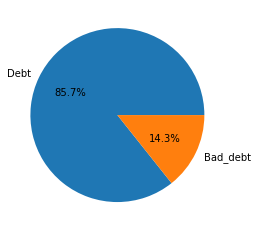

In [42]:
labels = 'Debt', 'Bad_debt'
sizes = [df_train['debt'].mean()*100, df_train['bad_debt'].mean()*100]
plt.pie(sizes,autopct='%1.1f%%',labels=labels)
plt.show()

In [43]:
# good debt
df_train['good_debt']=df_train['debt']-df_train['bad_debt']

In [44]:
df_train['good_debt'].head()

0    0.43555
1    0.56581
2    0.63972
3    0.51628
4    0.46512
Name: good_debt, dtype: float64

In [45]:
# 4.4 Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt and bad debt for different cities

In [46]:
df_train['city']

0           Hamilton
1         South Bend
2           Danville
3           San Juan
4          Manhattan
            ...     
27014          Coamo
27015      Blue Bell
27016        Weldona
27017    Colleyville
27018      Las Vegas
Name: city, Length: 27019, dtype: object

In [47]:
df_Hamilton = df_train.loc[df_train['city']=='Hamilton']
df_SouthBend = df_train.loc[df_train['city']=='South Bend']
df_Danville = df_train.loc[df_train['city']=='Danville']
df_SanJuan = df_train.loc[df_train['city']=='San Juan']
df_Manhattan = df_train.loc[df_train['city']=='Manhattan']
df_Nocona = df_train.loc[df_train['city']=='Nocona']
df_cities = pd.concat([df_Hamilton,df_SouthBend,df_Danville,df_SanJuan,df_Manhattan,df_Nocona])

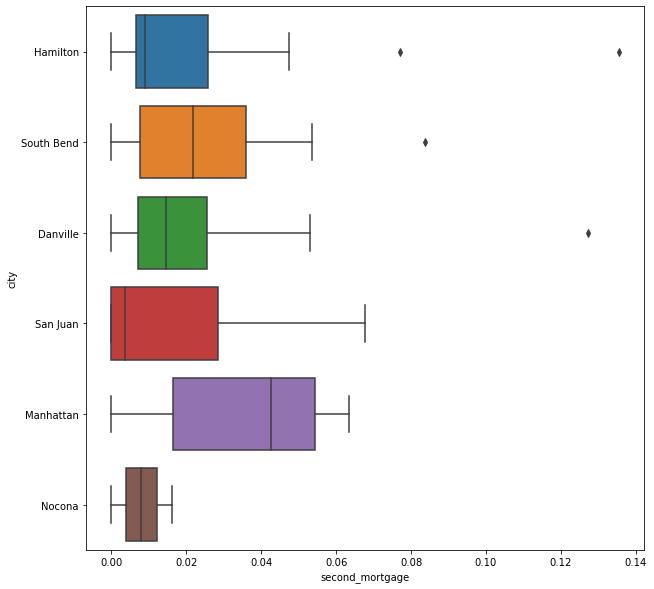

In [48]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_cities,x='second_mortgage',y='city')
plt.show()

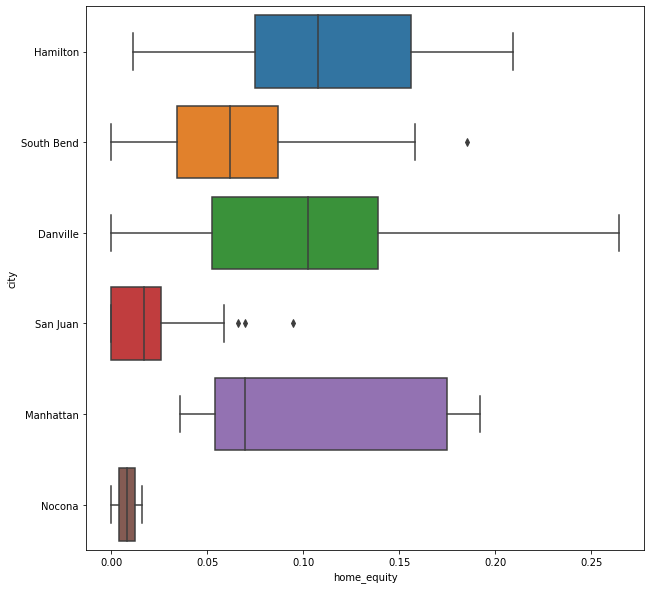

In [49]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_cities,x='home_equity',y='city')
plt.show()

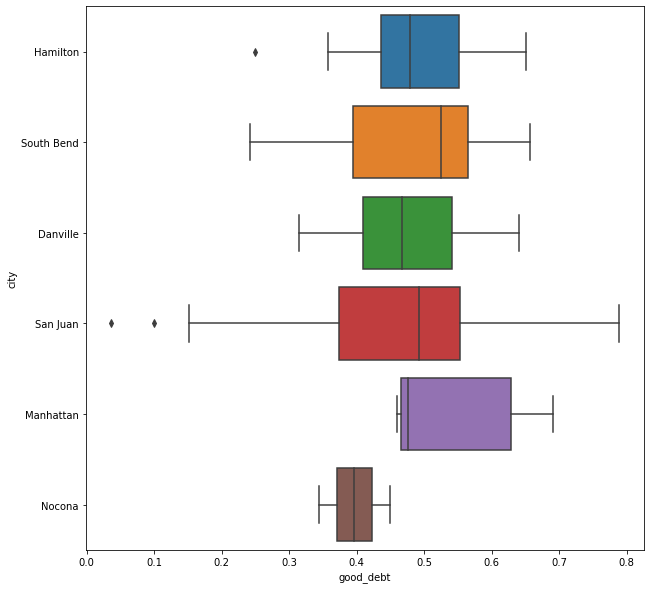

In [50]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_cities,x='good_debt',y='city')
plt.show()

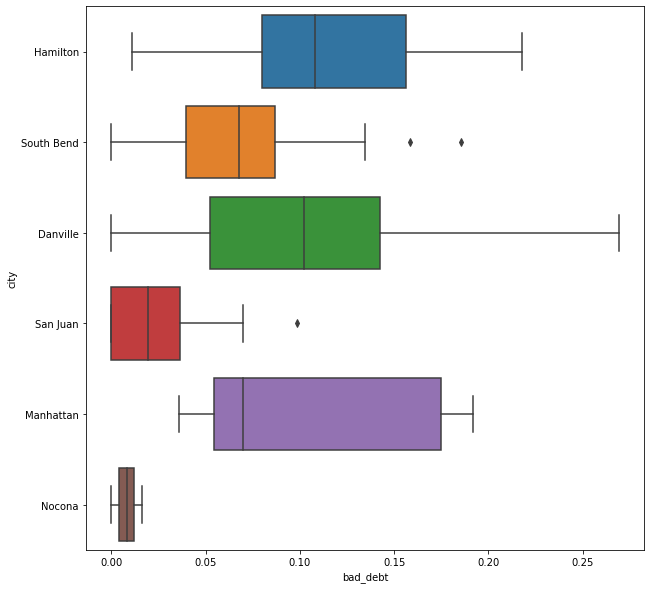

In [51]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_cities,x='bad_debt',y='city')
plt.show() 

C:\Users\Sanjana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sanjana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sanjana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

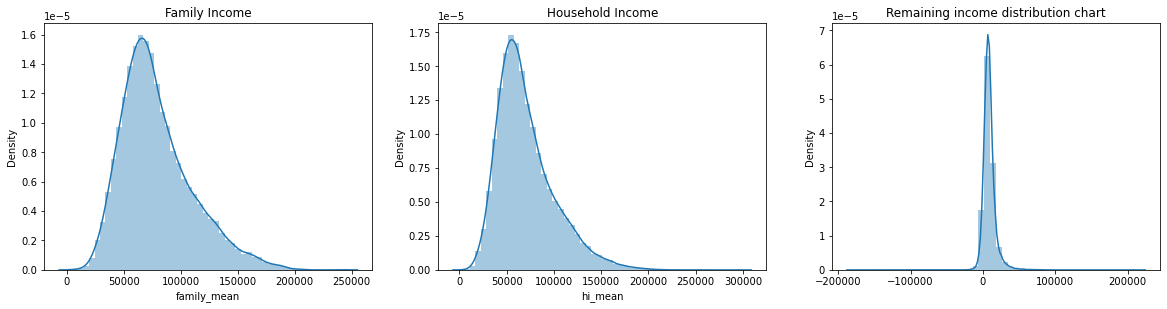

In [52]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.distplot(df_train['family_mean'])
plt.title('Family Income')
plt.subplot(2,3,2)
sns.distplot(df_train['hi_mean'])
plt.title('Household Income')
plt.subplot(2,3,3)
sns.distplot(df_train['family_mean']-df_train['hi_mean'])
plt.title('Remaining income distribution chart')
plt.show()

In [53]:
# 5. Perform EDA and come out with insights into population density and age.

In [54]:
# 5.1 Population density (hint-use ‘pop’ and ‘Aland’ to calculate)
df_train['pop'].head()

0    5230
1    2633
2    6881
3    2700
4    5637
Name: pop, dtype: int64

In [55]:
df_train['ALand'].head()

0    202183361.0
1      1560828.0
2     69561595.0
3      1105793.0
4      2554403.0
Name: ALand, dtype: float64

In [56]:
df_train['pop_density']=df_train['pop']/df_train['ALand']

In [57]:
df_train['pop_density'].head()

0    0.000026
1    0.001687
2    0.000099
3    0.002442
4    0.002207
Name: pop_density, dtype: float64

C:\Users\Sanjana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


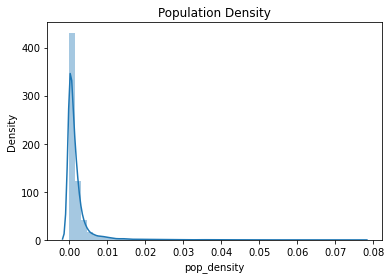

<Figure size 1440x720 with 0 Axes>

In [58]:
sns.distplot(df_train['pop_density'])
plt.title('Population Density')
plt.figure(figsize=(20,10))
plt.show()

In [59]:
# 5.2 median age (hint-use the variables ‘male_age_median’, ‘female_age_median’, ‘male_pop’, ‘female_pop’)

In [60]:
df_train['median_age']=(df_train['male_age_median']*df_train['male_pop']+df_train['female_age_median']*df_train['female_pop'])/df_train['pop']

In [61]:
df_train['median_age'].head()

0    44.667430
1    34.722748
2    41.774472
3    49.879012
4    21.965629
Name: median_age, dtype: float64

In [62]:
df_test['median_age']=(df_test['male_age_median']*df_test['male_pop']+df_test['female_age_median']*df_test['female_pop'])/df_test['pop']

In [63]:
df_test['median_age'].head()

0    31.189053
1    46.382991
2    43.147420
3    45.155104
4    43.235983
Name: median_age, dtype: float64

C:\Users\Sanjana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


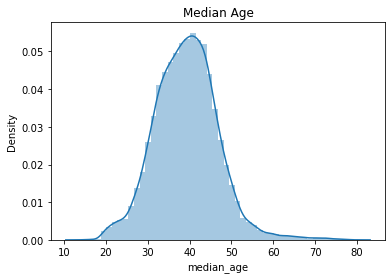

<Figure size 1440x720 with 0 Axes>

In [64]:
sns.distplot(df_train['median_age'])
plt.title('Median Age')
plt.figure(figsize=(20,10))
plt.show()

In [65]:
# 6.
# 6.1 Create bins for population into a new variable by selecting appropriate class interval so that the no of categories(bins) don’t exceed 5 for the ease of analysis. 

In [66]:
df_train['pop_bin']=pd.cut(df_train['pop'],bins=5,labels=['very_low','low','medium','high','very_high'])
df_train[['pop','pop_bin']]

,pop,pop_bin
0,5230,very_low
1,2633,very_low
2,6881,very_low
3,2700,very_low
4,5637,very_low
...,...,...
27014,1847,very_low
27015,4155,very_low
27016,2829,very_low
27017,11542,low


In [67]:
df_train['pop_bin'].value_counts()

very_low     26760
low            245
medium           9
high             4
very_high        1
Name: pop_bin, dtype: int64

In [68]:
# 6.2 Analyze the married, separated and divorced population for these population brackets.
df_train.groupby('pop_bin')[['married','separated','divorced']].count()

,married,separated,divorced
pop_bin,,,
very_low,26760,26760,26760
low,245,245,245
medium,9,9,9
high,4,4,4
very_high,1,1,1


<AxesSubplot:xlabel='pop_bin'>

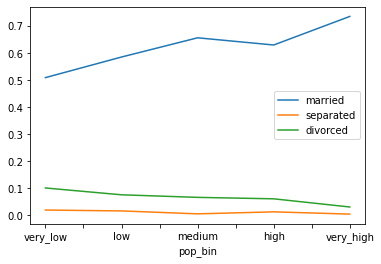

In [69]:
# 6.3 Visualize using appropriate chart type.
df_train.groupby('pop_bin')[['married','separated','divorced']].mean().plot()

In [70]:
# 7. Please detail your observations for rent as a percentage of income at an overall level and for different states.

In [71]:
rentmean = df_train.groupby(by='state')['rent_mean'].agg(["mean"])
rentmean.head()

,mean
state,
Alabama,772.384981
Alaska,1185.763570
Arizona,1098.248711
Arkansas,718.044133
California,1474.839976


In [72]:
income_mean = df_train.groupby(by='state')['family_mean'].agg(["mean"])
income_mean.head()

,mean
state,
Alabama,66956.895642
Alaska,92136.545109
Arizona,73325.150744
Arkansas,64409.153057
California,87844.208331


In [73]:
rent_perc_of_income=rentmean['mean']/income_mean['mean']
rent_perc_of_income.head()

state
Alabama       0.011536
Alaska        0.012870
Arizona       0.014978
Arkansas      0.011148
California    0.016789
Name: mean, dtype: float64

In [74]:
# overall level rent as a percentage of income
sum(df_train['rent_mean'])/sum(df_train['family_mean'])

0.013349672690490422

In [78]:
# 8. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings. 

In [79]:
correlation = df_train[['COUNTYID', 'STATEID','type','zip_code','pop','rent_mean',
                 'hi_mean','family_mean','hc_mortgage_mean','second_mortgage','home_equity','hs_degree','debt',
                 'male_age_mean','female_age_mean','married','separated','divorced','pop_density','median_age']].corr()

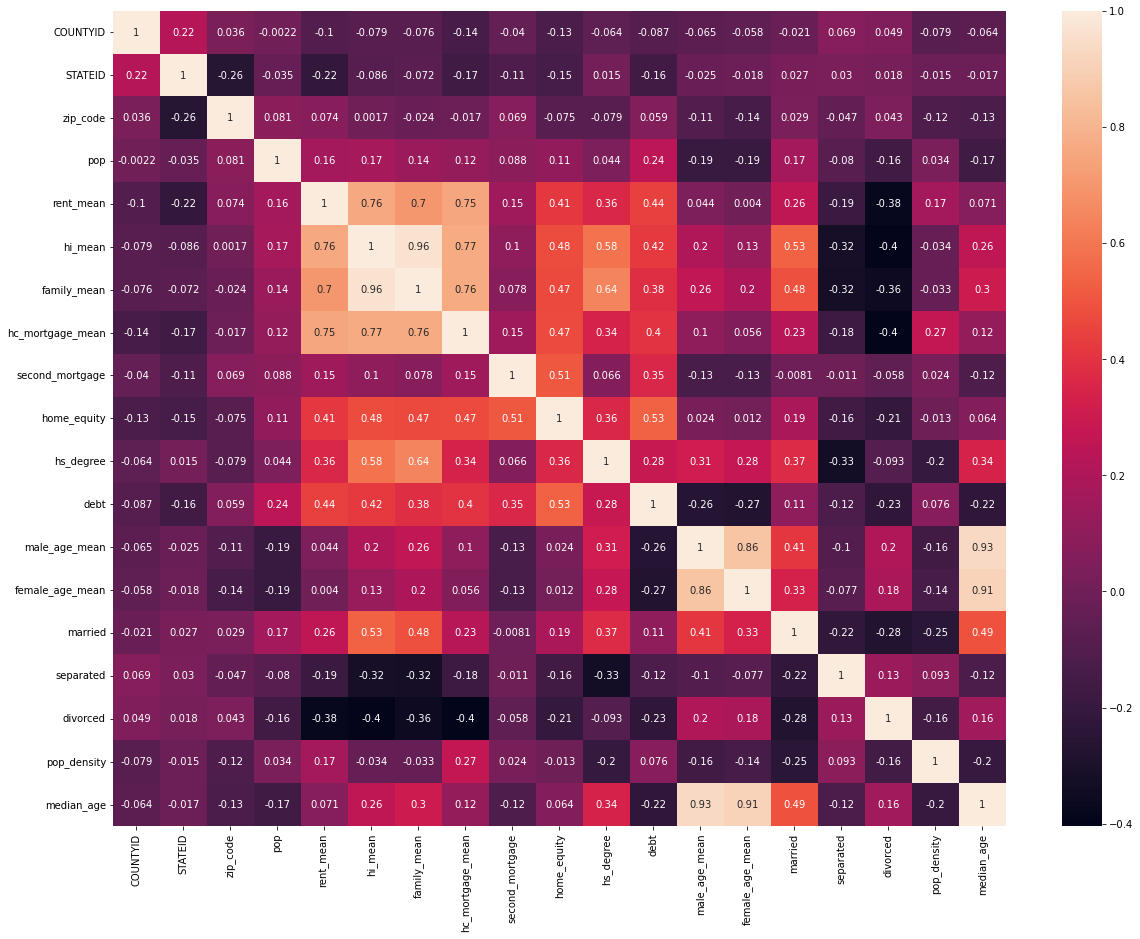

In [80]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation,annot=True)
plt.show()

 ### High positive correaltion is noticed between rent_mean,hi_mean, family_mean,hc_mean

In [118]:
df_train.isnull().sum().sum()

0

In [89]:
df_train = df_train.dropna()

In [90]:
df_train.isnull().sum().sum()

0

In [119]:
df_test.isnull().sum().sum()

74

In [121]:
df_test = df_test.dropna()
df_test.isnull().sum().sum()

0

In [81]:
# 9. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. Each variable is assumed to depend on a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as "specific variance" because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data Highschool graduation rates Median population age Second Mortgage Statistics Percent Own Bad Debt Expense

In [91]:
import time
import random
from math import *
import operator
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [92]:
!pip install factor_analyzer

In [93]:
fa=FactorAnalyzer(n_factors=5)
fa.fit_transform(df_train.select_dtypes(exclude= ('object','category')))
fa.loadings_

array([[-1.16485168e-01,  2.06274596e-02, -2.45069912e-02,
        -6.10816218e-02,  3.63669562e-02],
       [-1.11356455e-01,  1.68524213e-02,  2.29768886e-02,
        -1.47827654e-01,  1.12689792e-01],
       [-9.18822088e-02,  4.63844115e-02, -1.19871803e-01,
        -4.96485383e-02, -1.25761844e-01],
       [ 1.49351014e-02,  1.80853974e-02,  6.64003254e-03,
         2.91117311e-02, -1.14110846e-02],
       [ 9.46726440e-02, -1.03200999e-01, -4.46990341e-02,
        -1.36559409e-01, -1.45197113e-01],
       [-3.52583451e-03, -3.58465603e-02,  1.33236857e-01,
         9.38695523e-03,  1.29358163e-01],
       [-4.36661764e-02, -2.14518632e-02,  3.68896350e-02,
        -9.23071227e-02,  6.28011091e-02],
       [-2.84085141e-03, -1.54322018e-02, -2.38664918e-03,
        -4.41005481e-02,  2.42294243e-02],
       [ 7.60103037e-02,  9.61009896e-01, -9.29654228e-02,
        -3.83786784e-03, -6.95922343e-02],
       [ 6.70044274e-02,  9.25418852e-01, -1.07900235e-01,
        -2.43019065e-02

In [ ]:
# 10. Build a linear Regression model to predict the total monthly expenditure for home mortgages loan; please refer - ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is mean monthly mortgage and owner costs of specified geographical location.


In [132]:
df_train['type'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [133]:
# Label encoding

In [134]:
type_dict={'type':{'City':1, 'Urban':2, 'Town':3, 'CDP':4, 'Village':5, 'Borough':6}}
df_train.replace(type_dict,inplace=True)

C:\Users\Sanjana\AppData\Local\Temp\ipykernel_14772\2992135029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.replace(type_dict,inplace=True)


In [135]:
type_dict={'type':{'City':1, 'Urban':2, 'Town':3, 'CDP':4, 'Village':5, 'Borough':6}}
df_test.replace(type_dict,inplace=True)

In [136]:
df_train['type'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [137]:
df_test['type'].unique()

array([4, 1, 6, 3, 5, 2], dtype=int64)

In [138]:
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [139]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'median_age','pct_own', 'married','separated', 'divorced']

In [140]:
x_train=df_train[feature_cols]
y_train=df_train['hc_mortgage_mean']

In [141]:
x_test=df_test[feature_cols]
y_test=df_test['hc_mortgage_mean']

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score

In [ ]:
# 10.1 Run a model at a Nation level

In [143]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [144]:
linereg=LinearRegression()
linereg.fit(x_train_scaled,y_train)

LinearRegression()

In [145]:
y_pred=linereg.predict(x_test_scaled)

In [146]:
print("Overall R2 score of linear regression model", r2_score(y_test,y_pred))
print("Overall RMSE of linear regression model", np.sqrt(mean_squared_error(y_test,y_pred)))

Overall R2 score of linear regression model 0.7392288946366496
Overall RMSE of linear regression model 321.5683543495721


### The accuracy levels and R square are not satisfactory

In [147]:
# 10.2 Run another model at State level

In [149]:
state=df_train['STATEID'].unique()
state[0:10]

array([36, 18, 72, 20,  1, 48, 45,  6,  5, 24], dtype=int64)

In [150]:
# consider some of the stateid for the modeling

In [159]:
for i in [20,1,45]:
    print("State ID-",i)
    
    x_train_nation=df_train[df_train['COUNTYID']==i][feature_cols]
    y_train_nation=df_train[df_train['COUNTYID']==i]['hc_mortgage_mean']
    
    x_test_nation=df_test[df_test['COUNTYID']==i][feature_cols]
    y_test_nation=df_test[df_test['COUNTYID']==i]['hc_mortgage_mean']
    
    x_train_scaled_nation=sc.fit_transform(x_train_nation)
    x_test_scaled_nation=sc.fit_transform(x_test_nation)
    
    linereg.fit(x_train_scaled_nation,y_train_nation)
    y_pred_nation=linereg.predict(x_test_scaled_nation)
    
    print("Overall R2 score of linear regression model for state,",i,":-" ,r2_score(y_test_nation,y_pred_nation))
    print("Overall RMSE of linear regression model for state,",i,":-" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")

State ID- 20
Overall R2 score of linear regression model for state, 20 :- 0.5940771632535314
Overall RMSE of linear regression model for state, 20 :- 312.1040633209575


State ID- 1
Overall R2 score of linear regression model for state, 1 :- 0.8085356730790425
Overall RMSE of linear regression model for state, 1 :- 310.21039433392895


State ID- 45
Overall R2 score of linear regression model for state, 45 :- 0.7883582307606087
Overall RMSE of linear regression model for state, 45 :- 225.9024766565906




C:\Users\Sanjana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


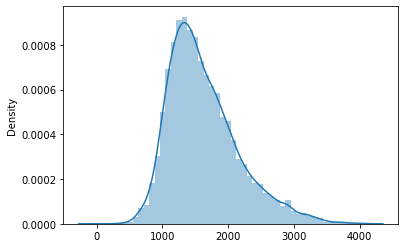

In [160]:
# 10.3 Test if predicted variable is normally distributed
sns.distplot(y_pred)
plt.show()

In [162]:
 df_train.to_csv('train.csv')

In [163]:
# 11. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. 

https://public.tableau.com/app/profile/sanjana.patil4147/viz/RealEstate_16761028873490/RealEstateDashboard?publish=yesffut